In [104]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
from geopandas import GeoDataFrame as gdf
import numpy as np
import seaborn as sns

#import geoplot as gplt

In [16]:
df = pd.read_csv('costcos-geocoded.csv')

In [17]:
df.head()

,Address,City,State,Zip Code,Latitude,Longitude
0,1205 N. Memorial Parkway,Huntsville,Alabama,35801-5930,34.743095,-86.600955
1,3650 Galleria Circle,Hoover,Alabama,35244-2346,33.377649,-86.812420
2,8251 Eastchase Parkway,Montgomery,Alabama,36117,32.363889,-86.150884
3,5225 Commercial Boulevard,Juneau,Alaska,99801-7210,58.359200,-134.483000
4,330 West Dimond Blvd,Anchorage,Alaska,99515-1950,61.143266,-149.884217


In [18]:
usa = gpd.read_file("cb_2018_us_state_20m.shp")
usa.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ..."
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77925, -96.57794 42.827..."
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.72220, -75.75323 39.757..."
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ..."
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987..."


<AxesSubplot:>

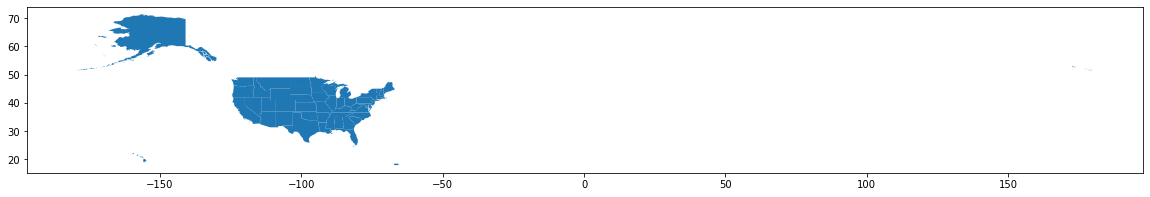

In [69]:
fig, ax = plt.subplots(figsize = (20, 5))
usa.plot(ax = ax)

<AxesSubplot:>

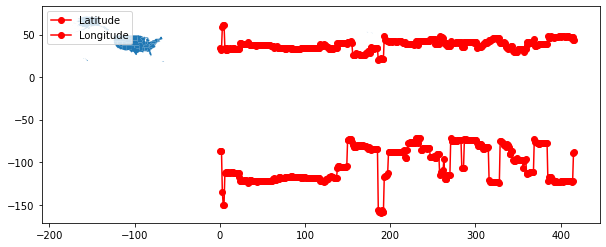

In [34]:
fig, ax1 = plt.subplots(figsize = (10, 5))
usa.plot(ax = ax1)
df.plot(ax = ax1, marker = 'o', color = 'red')


In [71]:
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
crs = {'init': 'epsg:4326'}

In [72]:
geo_df = gpd.GeoDataFrame(df, crs = crs, geometry = geometry)

In [73]:
geo_df.head()

,Address,City,State,Zip Code,Latitude,Longitude,geometry
0,1205 N. Memorial Parkway,Huntsville,Alabama,35801-5930,34.743095,-86.600955,POINT (-86.60096 34.74309)
1,3650 Galleria Circle,Hoover,Alabama,35244-2346,33.377649,-86.812420,POINT (-86.81242 33.37765)
2,8251 Eastchase Parkway,Montgomery,Alabama,36117,32.363889,-86.150884,POINT (-86.15088 32.36389)
3,5225 Commercial Boulevard,Juneau,Alaska,99801-7210,58.359200,-134.483000,POINT (-134.48300 58.35920)
4,330 West Dimond Blvd,Anchorage,Alaska,99515-1950,61.143266,-149.884217,POINT (-149.88422 61.14327)


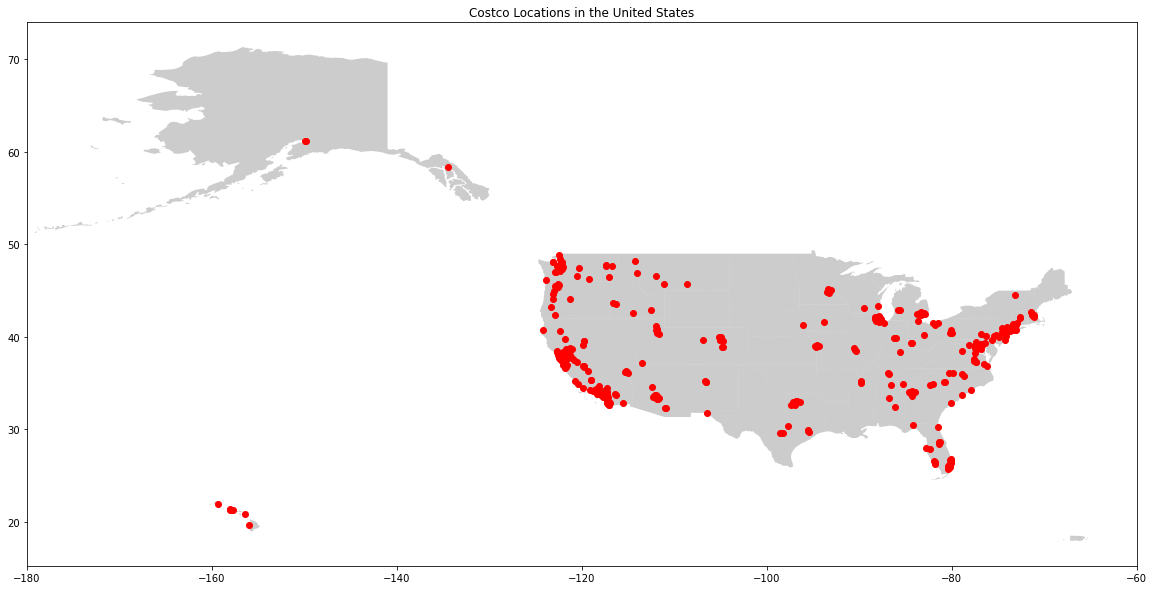

In [78]:
fig, ax = plt.subplots(figsize = (20, 10))
usa.plot(ax = ax, alpha = 0.4, color = 'grey')
geo_df.plot(ax = ax, color = 'red')
plt.xlim([-180, -60])
plt.title('Costco Locations in the United States')
plt.show()

In [80]:
# read in file

ed = pd.read_csv('education.csv')

In [81]:
ed.head()

,Region,state,reading,math,writing,percent_graduates_sat,pupil_staff_ratio,dropout_rate,Target
0,South,Alabama,557,552,549,7,6.7,2.3,3
1,North West,Alaska,520,516,492,46,7.9,7.3,3
2,South West,Arizona,516,521,497,26,10.4,7.6,3
3,South,Arkansas,572,572,556,5,6.8,4.6,3
4,West,California,500,513,498,49,10.9,5.5,3


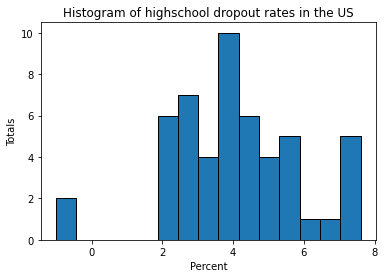

In [88]:
# Create histogram

plt.hist(ed['dropout_rate'], bins = 15, edgecolor = 'black')
plt.title('Histogram of highschool dropout rates in the US')
plt.xlabel('Percent')
plt.ylabel('Totals')
plt.show()

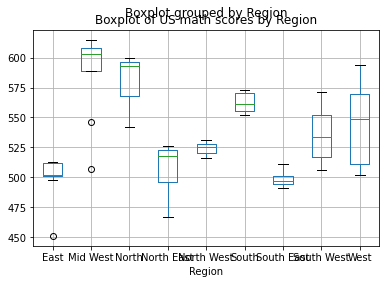

In [103]:
# Create boxplot

ed.boxplot(column = 'math', by = 'Region')
plt.title('Boxplot of US math scores by Region')
plt.show()

<AxesSubplot:title={'center':'Boxplot of US math scores by region'}, xlabel='Region', ylabel='math'>

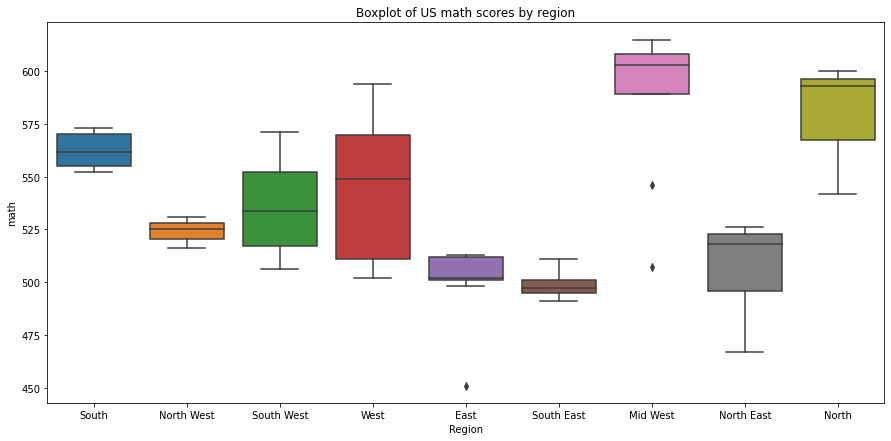

In [172]:
# boxplot in seaborn
plt.figure(figsize = (15, 7))
plt.title('Boxplot of US math scores by region')
sns.boxplot(x='Region', y ='math', data = ed)

In [120]:
# Guage Chart

import plotly.graph_objects as go

fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = 4.07,
    domain = {'x': [0, 1], 'y': [0, 1]},
    title = {'text': "Average US Highschool Dropout Rate"}))

fig.show()

In [116]:
conda install plotly

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\quefi\Anaconda3

  added / updated specs:
    - plotly


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    plotly-5.1.0               |     pyhd3eb1b0_0         2.7 MB
    tenacity-6.3.1             |   py37haa95532_0          83 KB
    ------------------------------------------------------------
                                           Total:         2.8 MB

The following NEW packages will be INSTALLED:

  plotly             pkgs/main/noarch::plotly-5.1.0-pyhd3eb1b0_0
  tenacity           pkgs/main/win-64::tenacity-6.3.1-py37haa95532_0




tenacity-6.3.1       | 83 KB     |            |   0% 
tenacity-6.3.1       | 83 KB     | #9         |  19% 
tenacity-6.3.1       | 83 KB     | ########## | 100% 
tenacity-6.3.1       | 83 KB     | ########## | 100% 

plotly-5.1.0         | 2.7 MB    |        

In [133]:
import plotly as py
import plotly.figure_factory as ff

In [131]:
data =({"label": "West", "sublabel": "US$, in thousands",
   "range": [150, 225, 300], "performance": [220,270], "point": [250]}, 
       {"label": "Mid West", "sublabel": "%", "range": [20, 25, 30],
   "performance": [21, 23], "point": [26]}, 
       {"label": "East", "sublabel":"US$, average","range": [350, 500, 600],
   "performance": [100,320],"point": [550]}, 
       {"label": "South", "sublabel": "count", "range": [1400, 2000, 2500],
   "performance": [1000, 1650],"point": [2100]}, 
       {"label": "South West", "sublabel": "out of 5","range": [3.5, 4.25, 5],
   "performance": [3.2, 4.7], "point": [4.4]},
       {"label": "South East", "sublabel": "out of 5","range": [3.5, 4.25, 5],
   "performance": [3.2, 4.7], "point": [4.4]}, 
       {"label": "North East", "sublabel": "out of 5","range": [3.5, 4.25, 5],
   "performance": [3.2, 4.7], "point": [4.4]}, 
       {"label": "North West", "sublabel": "out of 5","range": [3.5, 4.25, 5],
   "performance": [3.2, 4.7], "point": [4.4]}, 
       {"label": "North", "sublabel": "out of 5","range": [3.5, 4.25, 5],
   "performance": [3.2, 4.7], "point": [4.4]})

fig = ff.create_bullet(data)
py.iplot(fig, filename='bullet chart from a dataframe')

AttributeError: module 'plotly' has no attribute 'iplot'

In [128]:
data

({'label': 'West',
  'sublabel': 'US$, in thousands',
  'range': [150, 225, 300],
  'performance': [220, 270],
  'point': [250]},
 {'label': 'Mid West',
  'sublabel': '%',
  'range': [20, 25, 30],
  'performance': [21, 23],
  'point': [26]},
 {'label': 'East',
  'sublabel': 'US$, average',
  'range': [350, 500, 600],
  'performance': [100, 320],
  'point': [550]},
 {'label': 'South',
  'sublabel': 'count',
  'range': [1400, 2000, 2500],
  'performance': [1000, 1650],
  'point': [2100]},
 {'label': 'South West',
  'sublabel': 'out of 5',
  'range': [3.5, 4.25, 5],
  'performance': [3.2, 4.7],
  'point': [4.4]},
 {'label': 'South East',
  'sublabel': 'out of 5',
  'range': [3.5, 4.25, 5],
  'performance': [3.2, 4.7],
  'point': [4.4]},
 {'label': 'North East',
  'sublabel': 'out of 5',
  'range': [3.5, 4.25, 5],
  'performance': [3.2, 4.7],
  'point': [4.4]},
 {'label': 'North West',
  'sublabel': 'out of 5',
  'range': [3.5, 4.25, 5],
  'performance': [3.2, 4.7],
  'point': [4.4]},
 {'l

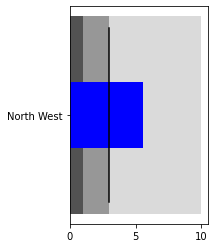

In [158]:
limits = [1, 3, 10]
data_to_plot = ('North West', 5.6, 3) # ('Mid West', 32, 3)]
palette = sns.color_palette("Greys_r", len(limits))

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_yticks([1])
ax.set_yticklabels([data_to_plot[0]])

prev_limit = 0
for idx, lim in enumerate(limits):
    ax.barh([1], lim-prev_limit, left=prev_limit, height=15, color=palette[idx])
    prev_limit = lim

ax.barh([1], data_to_plot[1], color='blue', height=5)
ax.axvline(data_to_plot[2], color="black", ymin=0.10, ymax=0.9)

In [165]:
def bulletgraph(data=None, limits=None, labels=None, axis_label=None, title=None,
                size=(5, 3), palette=None, formatter=None, target_color="gray",
                bar_color="black", label_color="gray"):
    """ Build out a bullet graph image
        Args:
            data = List of labels, measures and targets
            limits = list of range valules
            labels = list of descriptions of the limit ranges
            axis_label = string describing x axis
            title = string title of plot
            size = tuple for plot size
            palette = a seaborn palette
            formatter = matplotlib formatter object for x axis
            target_color = color string for the target line
            bar_color = color string for the small bar
            label_color = color string for the limit label text
        Returns:
            a matplotlib figure
    """
    # Determine the max value for adjusting the bar height
    # Dividing by 10 seems to work pretty well
    h = limits[-1] / 10

    # Use the green palette as a sensible default
    if palette is None:
        palette = sns.light_palette("grey", len(limits), reverse=False)

    # Must be able to handle one or many data sets via multiple subplots
    if len(data) == 1:
        fig, ax = plt.subplots(figsize=size, sharex=True)
    else:
        fig, axarr = plt.subplots(len(data), figsize=size, sharex=True)

    # Add each bullet graph bar to a subplot
    for idx, item in enumerate(data):

        # Get the axis from the array of axes returned when the plot is created
        if len(data) > 1:
            ax = axarr[idx]

        # Formatting to get rid of extra marking clutter
        ax.set_aspect('equal')
        ax.set_yticklabels([item[0]])
        ax.set_yticks([1])
        ax.spines['bottom'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)

        prev_limit = 0
        for idx2, lim in enumerate(limits):
            # Draw the bar
            ax.barh([1], lim - prev_limit, left=prev_limit, height=h,
                    color=palette[idx2])
            prev_limit = lim
        rects = ax.patches
        # The last item in the list is the value we're measuring
        # Draw the value we're measuring
        ax.barh([1], item[1], height=(h / 3), color=bar_color)

        # Need the ymin and max in order to make sure the target marker
        # fits
        ymin, ymax = ax.get_ylim()
        ax.vlines(
            item[2], ymin * .9, ymax * .9, linewidth=1.5, color=target_color)

    # Now make some labels
    if labels is not None:
        for rect, label in zip(rects, labels):
            height = rect.get_height()
            ax.text(
                rect.get_x() + rect.get_width() / 2,
                -height * .4,
                label,
                ha='center',
                va='bottom',
                color=label_color)
    if formatter:
        ax.xaxis.set_major_formatter(formatter)
    if axis_label:
        ax.set_xlabel(axis_label)
    if title:
        fig.suptitle(title, fontsize=14)
    fig.subplots_adjust(hspace=0)

C:\Users\quefi\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: UserWarning:

FixedFormatter should only be used together with FixedLocator



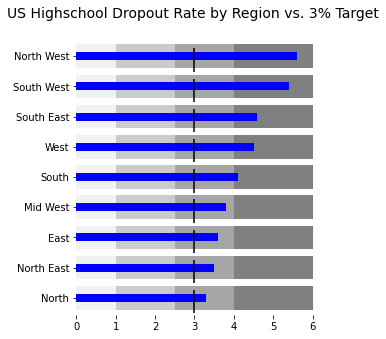

In [167]:
data_to_plot2 = [("North West", 5.6, 3),
                 ("South West", 5.4, 3),
                 ("South East", 4.6, 3),
                 ("West", 4.5, 3),
                 ("South", 4.1, 3),
                 ("Mid West", 3.8, 3),
                 ("East", 3.6, 3),
                 ("North East", 3.5, 3),
                 ("North", 3.3, 3)]5.6

bulletgraph(data_to_plot2, limits=[1, 2.5, 4, 6],
            size=(8,5),
            label_color="black",
            bar_color="blue", target_color='black',
            title="US Highschool Dropout Rate by Region vs. 3% Target")